#import package 

In [36]:
import numpy as np
import pandas as pd
import time
from pandas import DataFrame as df
from sklearn.metrics import *
import seaborn as sns
import os
import json
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
import random
from numpy.random import seed
seed(1)

#import glob
#from keras.utils import Sequence
#import math
#import numpy as np

#remember to install tensorflow 
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(1)
from tensorflow.keras.preprocessing import *

#remember to install opencv-python
import imageio
import cv2

Visualization

In [2]:
print(os.listdir("Desktop/ART"))

['artists.csv', 'images', 'resized']


In [3]:
painters = pd.read_csv("Desktop/ART/artists.csv")
# Sort artists by number of paintings
painters = painters.sort_values(by=['paintings'], ascending=False)

# Create a dataframe with painters having more than 150 paintings
painters_used = painters[painters['paintings'] >= 150].reset_index()
painters_used = painters_used[['name', 'paintings']]

painters.shape
painters_used.shape
print("The shape of painters: ", painters.shape,  "\nThe shape of painters_used: ", painters_used.shape)

The shape of painters:  (50, 8) 
The shape of painters_used:  (18, 2)


Data Processing

In [4]:
#Separate the data by nationality
painters_by_nationality = painters[['nationality', 'paintings']].groupby(['nationality'], as_index = False).sum()
painters_nationality_top = painters_by_nationality.sort_values('paintings', ascending = False)[:10]

painters_count_names = painters[['nationality', 'name']].groupby(['nationality']).count()
painters_count_names = painters_count_names.rename({'name' : 'number of artists'}, axis=1)

painters_nationality_top = painters_nationality_top.join(painters_count_names, on = 'nationality')
print(painters_nationality_top)

                 nationality  paintings  number of artists
6                     French       2120                 13
4                      Dutch       1360                  4
15                   Spanish       1099                  5
11                   Italian       1087                  8
14                   Russian        484                  4
5                    Flemish        356                  3
9                     German        328                  1
7             French,British        259                  1
8   French,Jewish,Belarusian        239                  1
0                   American        205                  2


1）Plot paintings by nationality of the painters whose painting more than 150.

France is a place where many painters are born!!!!! 


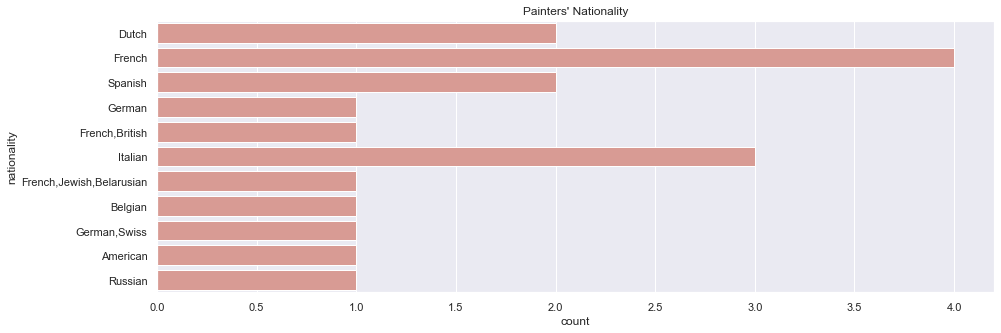

In [5]:
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
Np = sns.countplot(y='nationality',data=painters[painters['paintings'] >= 150],color="salmon", saturation=.5)
plt.title("Painters' Nationality")
print("France is a place where many painters are born",end = "")

for i in range(5):
    print("!",end = '',flush = True)
    time.sleep(0.1)
Np
print (" ")

2）Plot painters and count of paintings

[]

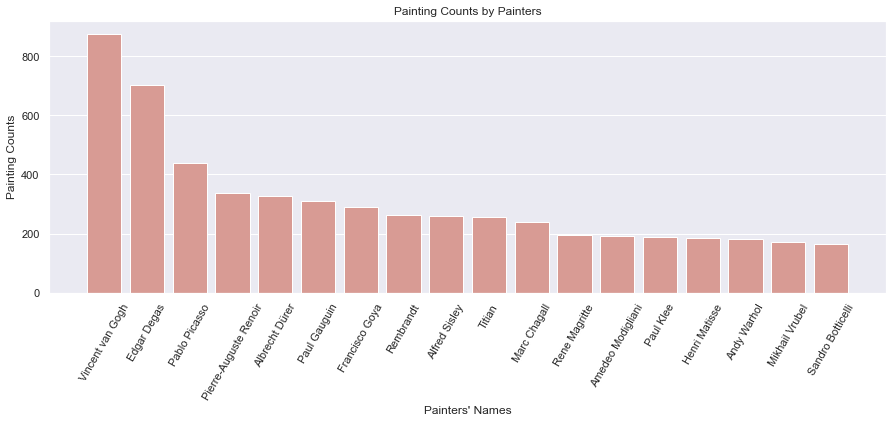

In [7]:
plt.rcParams['figure.figsize'] = (15, 5) 
plt.rcParams['axes.titlesize'] = 19
plt.rcParams['axes.labelsize'] = 19
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

x = "name"
y = "paintings"
sns.set(style="darkgrid")
sns.barplot(x=x, y=y, data=painters[painters['paintings'] >= 150],color="salmon", saturation=.5)    
plt.xticks(rotation=60)
plt.title("Painting Counts by Painters")
plt.xlabel("Painters' Names")
plt.ylabel("Painting Counts")
plt.plot()

3)Create dataframe with artists having more than 150 paintings.

In [8]:
sum_paintings = painters_used.paintings.sum()
sum_painters_used_paintings = painters_used.shape[0] * painters_used.paintings
painters_used['class_weight'] = sum_paintings / sum_painters_used_paintings
print("Sum_paintings: ",sum_paintings)
print (painters_used)

Sum_paintings:  5576
                     name  paintings  class_weight
0        Vincent van Gogh        877      0.353224
1             Edgar Degas        702      0.441279
2           Pablo Picasso        439      0.705644
3   Pierre-Auguste Renoir        336      0.921958
4          Albrecht Dürer        328      0.944444
5            Paul Gauguin        311      0.996070
6          Francisco Goya        291      1.064528
7               Rembrandt        262      1.182358
8           Alfred Sisley        259      1.196053
9                  Titian        255      1.214815
10           Marc Chagall        239      1.296141
11          Rene Magritte        194      1.596793
12      Amedeo Modigliani        193      1.605066
13              Paul Klee        188      1.647754
14          Henri Matisse        186      1.665472
15            Andy Warhol        181      1.711479
16         Mikhail Vrubel        171      1.811566
17      Sandro Botticelli        164      1.888889


In [9]:
# Set class weights - assign higher weights to underrepresented classes
class_weights = painters_used['class_weight'].to_dict()
class_weights

{0: 0.3532243760293931,
 1: 0.4412788857233302,
 2: 0.7056441407238674,
 3: 0.921957671957672,
 4: 0.9444444444444444,
 5: 0.9960700250089317,
 6: 1.064528445971745,
 7: 1.1823579304495335,
 8: 1.1960531960531962,
 9: 1.2148148148148148,
 10: 1.2961413296141329,
 11: 1.5967926689576175,
 12: 1.6050662061024756,
 13: 1.6477541371158393,
 14: 1.6654719235364397,
 15: 1.7114794352363414,
 16: 1.811565951916829,
 17: 1.8888888888888888}

In [10]:
#Change the data"Albrecht" to make it can be used
updated_name = "Albrecht_Dürer".replace("_", " ")
painters_used.iloc[4, 0] = updated_name

In [11]:
#load the image and normalize the data 
images_dir = 'Desktop/ART/images/images'
painters_dirs = os.listdir(images_dir)
painters_used_name = painters_used['name'].str.replace(' ', '_').values

# See if all directories exist
for name in painters_used_name:
    if os.path.exists(os.path.join(images_dir, name)):
        print("Images by  ", name ,"  is existed")
    else:
        print("Images by  ", name, "  is not existed")

Images by   Vincent_van_Gogh   is existed
Images by   Edgar_Degas   is existed
Images by   Pablo_Picasso   is existed
Images by   Pierre-Auguste_Renoir   is existed
Images by   Albrecht_Dürer   is existed
Images by   Paul_Gauguin   is existed
Images by   Francisco_Goya   is existed
Images by   Rembrandt   is existed
Images by   Alfred_Sisley   is existed
Images by   Titian   is existed
Images by   Marc_Chagall   is existed
Images by   Rene_Magritte   is existed
Images by   Amedeo_Modigliani   is existed
Images by   Paul_Klee   is existed
Images by   Henri_Matisse   is existed
Images by   Andy_Warhol   is existed
Images by   Mikhail_Vrubel   is existed
Images by   Sandro_Botticelli   is existed


Test the image data and print some random images

Print few random paintings: 


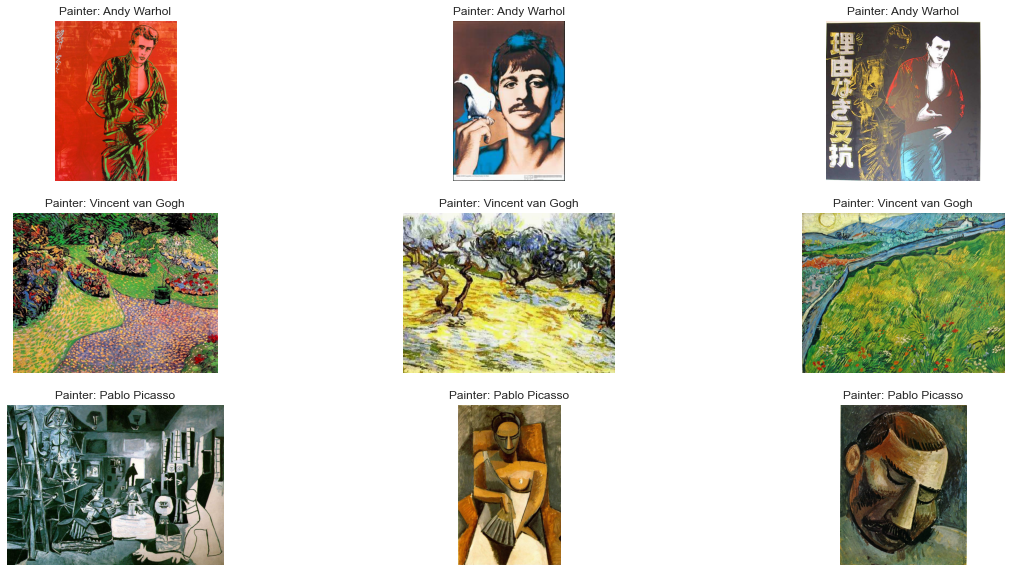

In [12]:
# Print few random paintings
print ("Print few random paintings: ")

def print_random_paintings(na = 3, np = 3):
  
    fig, axes = plt.subplots(na, np, figsize=(20,10))

    for i in range(na):
        random_painters = random.choice(painters_used_name)
        random_images = random.sample(os.listdir(os.path.join(images_dir, random_painters)), np)
        j=0
        for ri in random_images:
          random_image_file = os.path.join(images_dir, random_painters, ri)
          image = plt.imread(random_image_file)
          axes[i, j].imshow(image)
          axes[i, j].set_title("Painter: " + random_painters.replace('_', ' '))
          axes[i, j].axis('off')
          j+=1

    return plt.show()
print_random_paintings()

Data Augmentation

In [24]:
#reference:https://keras.io/zh/preprocessing/image/
#Pre-processing Images
# Use the ImageDataGenerator to prevent model overfitting and improve generalization ability
train_input_shape = (224, 224, 3)
n_classes = painters_used.shape[0]

#rescale is a value by which we will multiply the data before any other processing. 
#Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), 
#so we target values between 0 and 1 instead by scaling with a 1/255. factor.

datagen = ImageDataGenerator(validation_split=0.2,
                                   rescale=1./255.,
                                   shear_range=5,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                  )

#class_mode: One of'categorical','binary','sparse' or None. 
#The default is'categorical. This parameter determines the form of the returned tag array,
#'categorical' will return 2D one-hot encoding tags,'binary' Returns a 1D binary label.
#'sparse' returns a 1D integer label. If it is None, no label is returned. 
#The generator will only generate batch data. In this case, use model.predict_generator() and model.evaluate_generator(), etc. It will be used in functions.

#BATCH_SIZE: the number of data samples captured in one training

#classes: optional parameter, a list of subfolders

#subset: Data subset ('training' or'validation'), if validation_split is set in ImageDataGenerator.

#target_size: Either None (default to original size) or tuple of ints (img_height, img_width).

train_generator = datagen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=32,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=painters_used_name.tolist()
                                                   )

valid_generator = datagen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=32,
                                                    subset="validation",
                                                    shuffle=True,
                                                    classes=painters_used_name.tolist()
                                                   )

#Divide in python with // means yes, // means divide two numbers, round down, for example 8 // 5 the result is 1

STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
print("Total numbers of batches =", STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)

Found 4469 images belonging to 18 classes.
Found 1107 images belonging to 18 classes.
Total numbers of batches = 139 and 34


In [14]:
#Try to use the Sequence not the model to process the data in order to use the gpu
#class SequenceData(Sequence):
#    def __init__(self, path, batch_size, target_size):
        # 初始化所需的参数
#        self.path = path
#        self.batch_size = batch_size
#        self.target_size = target_size
#        self.x_filenames = glob.glob(self.path + '*.jpg')
#        self.x_filenames.sort(key=lambda x: int(x.split('/')[-1][:-4]))

#    def __len__(self):
#        # 让代码知道这个序列的长度
#        num_imgs = len(glob.glob(self.path + '*.jpg'))
#        return math.ceil(num_imgs / self.batch_size)

#    def __getitem__(self, idx):
#        # 迭代器部分
#        batch_x = self.x_filenames[idx * self.batch_size: (idx + 1) * self.batch_size]
#        x_arrays = np.array([self.read_img(filename) for filename in batch_x])    # 读取一批图片
#        batch_y = np.zeros((self.batch_size, 1000))    # 为演示简洁全部假设y为0

#        return x_arrays, batch_y

#    def read_img(self, x):
#        try:
#            img = cv2.imread(x)    # 这里用cv2是因为读取图片比pillow快
#            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    #opencv读取通道顺序为BGR，所以要转换
#            img = cv2.resize(img, self.target_size)
#        except Exception as e:
#            print(e)
#        else:
#            return img

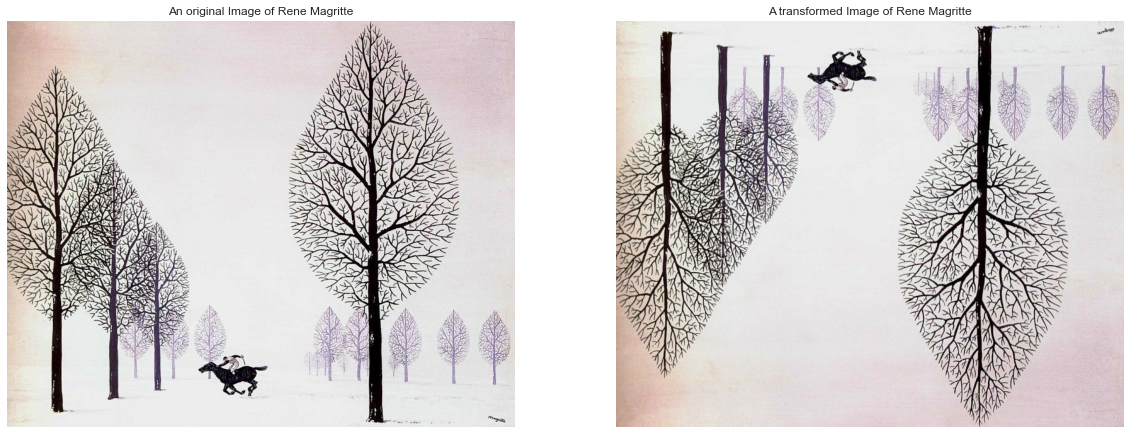

In [16]:
# Print a random paintings and it's random augmented version
fig, axes = plt.subplots(1, 2, figsize=(20,10))

random_painter = random.choice(painters_used_name)
random_image = random.choice(os.listdir(os.path.join(images_dir, random_painter)))
random_image_file = os.path.join(images_dir, random_painter, random_image)

image = plt.imread(random_image_file)
axes[0].imshow(image)
axes[0].set_title("An original Image of " + random_painter.replace('_', ' '))
axes[0].axis('off')

aug_image = datagen.random_transform(image)
axes[1].imshow(aug_image)
axes[1].set_title("A transformed Image of " + random_painter.replace('_', ' '))
axes[1].axis('off')

plt.show()

Build Module

In [17]:
# Load pre-trained model
# Reference：https://blog.csdn.net/weixin_40651515/article/details/105822437

#weights: one of None (random initialization), 'imagenet' (pre-training on ImageNet), or the path to the weights file to be loaded.
#include_top: whether to include the fully-connected layer at the top of the network.

#input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with 'channels_last' data format) 
#or (3, 224, 224) (with 'channels_first' data format). It should have exactly 3 inputs channels, and width and height should be no smaller than 32. 
#E.g. (200, 200, 3) would be one valid value.

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=train_input_shape)

for layer in base_model.layers:
    layer.trainable = True

In [18]:
print(base_model.output)
print(Flatten()(base_model.output))

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 2048), dtype=tf.float32, name=None), name='conv5_block3_out/Relu:0', description="created by layer 'conv5_block3_out'")
KerasTensor(type_spec=TensorSpec(shape=(None, 100352), dtype=tf.float32, name=None), name='flatten/Reshape:0', description="created by layer 'flatten'")


In [19]:
#reference:https://keras.io/zh/layers/core/
# Add layers at the end
X = base_model.output

# keras.layers.Flatten(data_format=None)
#Flatten the input. Does not affect batch size.
# use the Rectified linear unit to activate the function
#The initializer defines the method of setting the initial random weight of the Keras layer.
X = Flatten()(X)

#Units: positive integer, output space dimension
#He Normal distribution initializer. It draws samples from a truncated normal distribution 
#with a standard deviation of stddev = sqrt(2 / fan_in) centered on 0, where fan_in is the number of input units in the weight tensor.
X = Dense(512, kernel_initializer='he_uniform')(X)

#use the dropout to avoid and Prevent over-fitting and improve accuracy Rate: float between 0 and 1. The proportion of input that needs to be discarded.
X = Dropout(0.5)(X)

#This layer re-normalizes the activation value of the previous layer on each batch, so that the mean value of its output data is close to 0, and its standard deviation is close to 1.
X = BatchNormalization()(X)

#The initializer defines the method of setting the initial random weight of the Keras layer.
X = Activation('relu')(X)

X = Dense(16, kernel_initializer='he_uniform')(X)
X = Dropout(0.5)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

# Add a classifier, suppose we have n classes
output = Dense(n_classes, activation='softmax')(X)

# Build the complete model we need to train
model = Model(inputs=base_model.input, outputs=output)

In [20]:
#Adam optimizer.lr: float = 0. Learning rate.
optimizer = Adam(lr=0.0001)

#metrics: Model evaluation criteria during training and testing
#categorical_crossentropy:Computes the crossentropy loss between the labels and predictions.
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

Train Modle

In [21]:
n_epoch = 10

#When the monitoring value no longer improves, the callback function will stop training
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, 
                           mode='auto', restore_best_weights=True)

#When the standard evaluation stops improving, reduce the learning rate.
#patience:There is no improvement in the number of training rounds, after which the training rate will be reduced.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='auto')

In [22]:
# Train the model - all layers
history1 = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator, validation_steps=STEP_SIZE_VALID,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              callbacks=[reduce_lr],
                              use_multiprocessing=False,
                              workers=16,
                              class_weight=class_weights
                             )

C:\Users\lovep\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1876: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/10
139/139 [==============================] - 2125s 15s/step - loss: 2.7448 - accuracy: 0.1316 - val_loss: 3.7043 - val_accuracy: 0.0340
Epoch 2/10
139/139 [==============================] - 2137s 15s/step - loss: 2.3058 - accuracy: 0.2855 - val_loss: 3.3122 - val_accuracy: 0.0349
Epoch 3/10
139/139 [==============================] - 2083s 15s/step - loss: 2.1283 - accuracy: 0.3631 - val_loss: 3.1736 - val_accuracy: 0.0395
Epoch 4/10
139/139 [==============================] - 2027s 15s/step - loss: 1.9714 - accuracy: 0.4269 - val_loss: 2.8508 - val_accuracy: 0.1011
Epoch 5/10
139/139 [==============================] - 2021s 15s/step - loss: 1.9159 - accuracy: 0.4340 - val_loss: 2.7983 - val_accuracy: 0.1489
Epoch 6/10
139/139 [==============================] - 2019s 15s/step - loss: 1.8390 - accuracy: 0.4767 - val_loss: 2.7034 - val_accuracy:

In [23]:
# Freeze core ResNet layers and train again 
for layer in model.layers:
    layer.trainable = False
# That means to lock all the front layers, and then release the front 50 layers.
for layer in model.layers[:50]:
    layer.trainable = True

optimizer = Adam(lr=0.0001)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

n_epoch = 25
history2 = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator, validation_steps=STEP_SIZE_VALID,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              callbacks=[reduce_lr, early_stop],
                              use_multiprocessing=False,
                              workers=16,
                              class_weight=class_weights
                             )

Epoch 1/25
139/139 [==============================] - 1486s 11s/step - loss: 1.4208 - accuracy: 0.5884 - val_loss: 1.7105 - val_accuracy: 0.7123
Epoch 2/25
139/139 [==============================] - 1480s 11s/step - loss: 1.2970 - accuracy: 0.6033 - val_loss: 1.6563 - val_accuracy: 0.7252
Epoch 3/25
139/139 [==============================] - 1479s 11s/step - loss: 1.2636 - accuracy: 0.6152 - val_loss: 1.5945 - val_accuracy: 0.7252
Epoch 4/25
139/139 [==============================] - 1479s 11s/step - loss: 1.2372 - accuracy: 0.6003 - val_loss: 1.6156 - val_accuracy: 0.7077
Epoch 5/25
139/139 [==============================] - 1481s 11s/step - loss: 1.2793 - accuracy: 0.5899 - val_loss: 1.5686 - val_accuracy: 0.7298
Epoch 6/25
139/139 [==============================] - 1480s 11s/step - loss: 1.2369 - accuracy: 0.5992 - val_loss: 1.5568 - val_accuracy: 0.7215
Epoch 7/25
139/139 [==============================] - 1480s 11s/step - loss: 1.2072 - accuracy: 0.5994 - val_loss: 1.5188 - val_ac

In [26]:
# Merge history1 and history2
history = {}
history['loss'] = history1.history['loss'] + history2.history['loss']
history['accuracy'] = history1.history['accuracy'] + history2.history['accuracy']
history['val_loss'] = history1.history['val_loss'] + history2.history['val_loss']
history['val_accuracy'] = history1.history['val_accuracy'] + history2.history['val_accuracy']
history['lr'] = history1.history['lr'] + history2.history['lr']

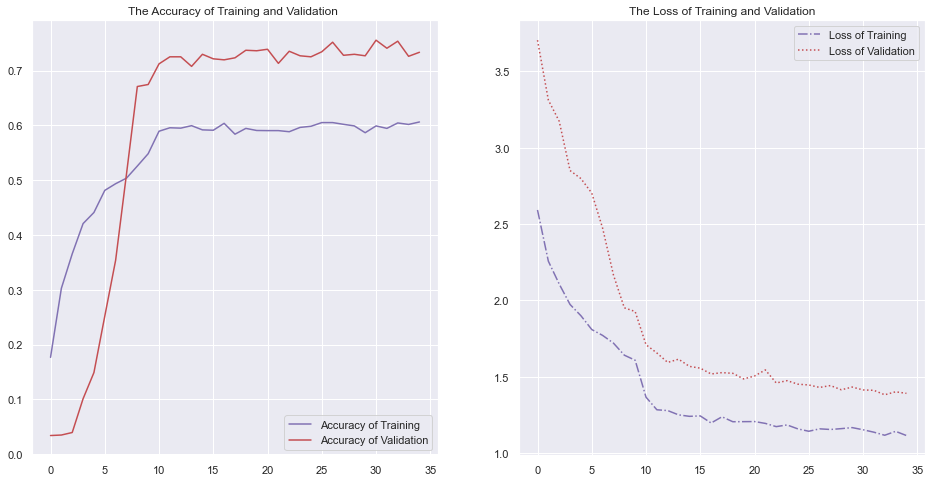

In [30]:
# Plot the training graph
def ptraining(history):
    accuracy = history['accuracy']
    val_accuracy = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(len(accuracy))

    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    
    axes[0].plot(epochs, accuracy, 'm-', label='Accuracy of Training')
    axes[0].plot(epochs, val_accuracy, 'r-', label='Accuracy of Validation')
    axes[0].set_title('The Accuracy of Training and Validation ')
    axes[0].legend(loc='best')

    axes[1].plot(epochs, loss, 'm-.', label='Loss of Training')
    axes[1].plot(epochs, val_loss, 'r:', label='Loss of Validation')
    axes[1].set_title('The Loss of Training and Validation')
    axes[1].legend(loc='best')
    
    plt.show()
    
ptraining(history)

In [31]:
# Prediction accuracy on train data
score = model.evaluate_generator(train_generator, verbose=1)
print("Training Data Prediction Accuracy =", score[1])

C:\Users\lovep\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1909: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


140/140 [==============================] - 295s 2s/step - loss: 0.9925 - accuracy: 0.8655
Training Data Prediction Accuracy = 0.8655180335044861


In [32]:
# Prediction accuracy on valid data
score = model.evaluate_generator(valid_generator, verbose=1)
print("Validation Data Prediction Vccuracy =", score[1])

35/35 [==============================] - 73s 2s/step - loss: 1.3951 - accuracy: 0.7299
Validation Data Prediction Vccuracy = 0.7299006581306458


Confusion Matrix. Look at the style of the artists which the model thinks are almost similar.

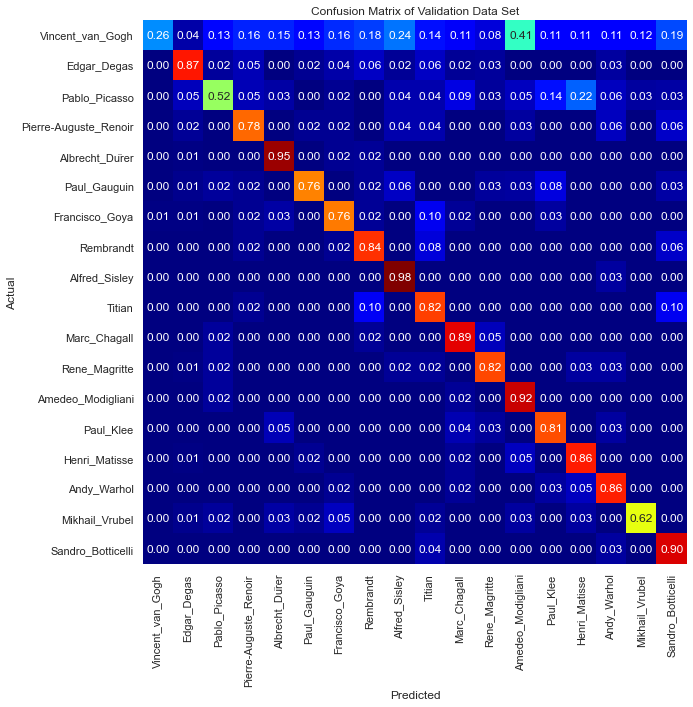

Classification Report:
                       precision    recall  f1-score   support

     Vincent_van_Gogh       0.98      0.26      0.41       170
          Edgar_Degas       0.84      0.87      0.85       137
        Pablo_Picasso       0.66      0.52      0.58        86
Pierre-Auguste_Renoir       0.71      0.78      0.75        64
      Albrecht_Dürer       0.77      0.95      0.85        65
         Paul_Gauguin       0.80      0.76      0.78        62
       Francisco_Goya       0.69      0.76      0.72        55
            Rembrandt       0.67      0.84      0.74        50
        Alfred_Sisley       0.70      0.98      0.82        51
               Titian       0.61      0.82      0.70        51
         Marc_Chagall       0.72      0.89      0.80        47
        Rene_Magritte       0.78      0.82      0.79        38
    Amedeo_Modigliani       0.61      0.92      0.73        37
            Paul_Klee       0.68      0.81      0.74        37
        Henri_Matisse       0.6

In [33]:
# Classification report and confusion matrix
tick_labels = painters_used_name.tolist()

def showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID):
    # Loop on each generator batch and predict
    y_pred, y_true = [], []
    for i in range(STEP_SIZE_VALID):
        (X,y) = next(valid_generator)
        y_pred.append(model.predict(X))
        y_true.append(y)
    
    # Create a flat list for y_true and y_pred
    y_pred = [subresult for result in y_pred for subresult in result]
    y_true = [subresult for result in y_true for subresult in result]
    
    # Update Truth vector based on argmax
    y_true = np.argmax(y_true, axis=1)
    y_true = np.asarray(y_true).ravel()
    
    # Update Prediction vector based on argmax
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = np.asarray(y_pred).ravel()
    
    # Confusion Matrix
    fig, ax = plt.subplots(figsize=(10,10))
    conf_matrix = confusion_matrix(y_true, y_pred, labels=np.arange(n_classes))
    conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1)
    sns.heatmap(conf_matrix, annot=True, fmt=".2f", square=True, cbar=False, 
                cmap=plt.cm.jet, xticklabels=tick_labels, yticklabels=tick_labels,
                ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title('Confusion Matrix of Validation Data Set')
    plt.show()
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=np.arange(n_classes), target_names=painters_used_name.tolist()))

showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID)

Prediction

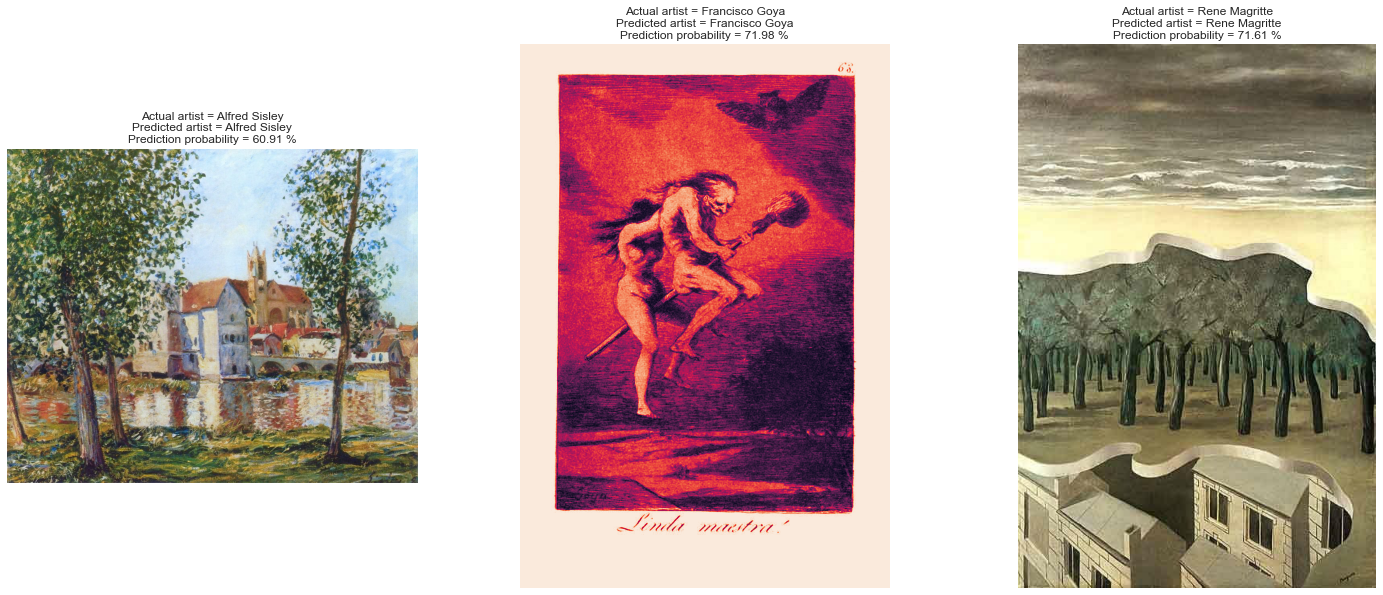

In [47]:
# Prediction
n = 3
fig, axes = plt.subplots(1, n, figsize=(25,10))

for i in range(n):
    random_artist = random.choice(painters_used_name)
    random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
    random_image_file = os.path.join(images_dir, random_artist, random_image)

    # Original image

    test_image = image.load_img(random_image_file, target_size=(train_input_shape[0:2]))

    # Predict artist
    #change the image to array, float which is fit for the keras
    test_image = image.img_to_array(test_image)
    
    #make the image's rgb lower to easy to process
    test_image /= 255.
    
    #to expand dimitions 
    test_image = np.expand_dims(test_image, axis=0)

    prediction = model.predict(test_image)
    prediction_probability = np.amax(prediction)
    prediction_idx = np.argmax(prediction)
    
    #Get the corresponding dictionary of the folder name and the serial number of the class
    #可获得文件夹名与类的序号的对应字典
    labels = train_generator.class_indices
    labels = dict((v,k) for k,v in labels.items())

    title = "Actual artist = {}\nPredicted artist = {}\nPrediction probability = {:.2f} %" \
                .format(random_artist.replace('_', ' '), labels[prediction_idx].replace('_', ' '),
                        prediction_probability*100)

    # Print image
    axes[i].imshow(plt.imread(random_image_file))
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()

Predicted artist = Alfred Sisley
Prediction probability = 63.82569670677185 %
right!!


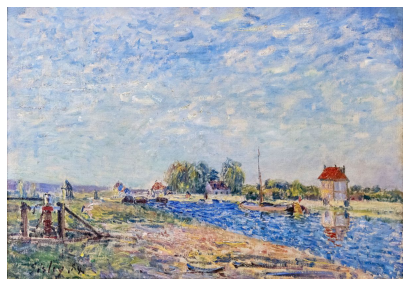

Predicted artist = Albrecht Dürer
Prediction probability = 15.832550823688507 %
right!!


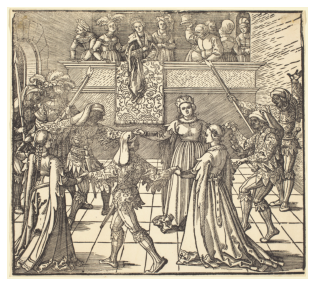

Predicted artist = Pablo Picasso
Prediction probability = 21.884915232658386 %
right!!


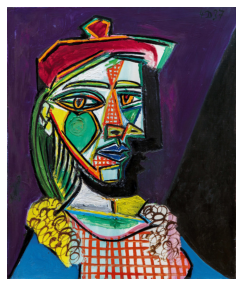

Predicted artist = Andy Warhol
Prediction probability = 48.66527020931244 %


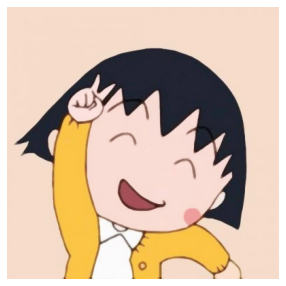

In [58]:
# Predict from web - this is an image of Titian.
# Replace 'url' with any image of one of the 11 artists above and run this cell.
url1 = 'https://eclecticlightdotcom.files.wordpress.com/2019/06/sisleyloingcanal.jpg?w=1200'
url2 = 'https://upload.wikimedia.org/wikipedia/commons/9/90/Albrecht_D%C3%BCrer-Masquerade_Dance_with_Torches.jpg'
url3 = 'https://static01.nyt.com/images/2018/03/02/arts/design/02picasso-print/01picasso1-superJumbo.jpg'
url4 = 'http://m.imeitou.com/uploads/allimg/2019012708/30gio5ajug4.jpg'
#example1

needpred_image1 = imageio.imread(url1)
needpred_image1 = cv2.resize(needpred_image1, dsize=train_input_shape[0:2], )
needpred_image1 = image.img_to_array(needpred_image1)
needpred_image1 /= 255.
needpred_image1 = np.expand_dims(needpred_image1, axis=0)
#example2

needpred_image2 = imageio.imread(url2)
needpred_image2 = cv2.resize(needpred_image2, dsize=train_input_shape[0:2], )
needpred_image2 = image.img_to_array(needpred_image2)
needpred_image2 /= 255.
needpred_image2 = np.expand_dims(needpred_image2, axis=0)
#example3

needpred_image3 = imageio.imread(url3)
needpred_image3 = cv2.resize(needpred_image3, dsize=train_input_shape[0:2], )
needpred_image3 = image.img_to_array(needpred_image3)
needpred_image3 /= 255.
needpred_image3 = np.expand_dims(needpred_image3, axis=0)
#example4
needpred_image4 = imageio.imread(url4)
needpred_image4 = cv2.resize(needpred_image4, dsize=train_input_shape[0:2], )
needpred_image4 = image.img_to_array(needpred_image4)
needpred_image4 /= 255.
needpred_image4 = np.expand_dims(needpred_image4, axis=0)

#example1
prediction1 = model.predict(needpred_image1)
prediction_probability1 = np.amax(prediction1)
prediction_idx1 = np.argmax(prediction1)

#example2
prediction2 = model.predict(needpred_image2)
prediction_probability2 = np.amax(prediction2)
prediction_idx2 = np.argmax(prediction2)

#example3
prediction3 = model.predict(needpred_image3)
prediction_probability3 = np.amax(prediction3)
prediction_idx3 = np.argmax(prediction3)

#example4
prediction4 = model.predict(needpred_image4)
prediction_probability4 = np.amax(prediction4)
prediction_idx4 = np.argmax(prediction4)

print("Predicted artist =", labels[prediction_idx1].replace('_', ' '))
print("Prediction probability =", prediction_probability1*100, "%")
print("right!!")
plt.imshow(imageio.imread(url1))
plt.axis('off')
plt.show()

print("Predicted artist =", labels[prediction_idx2].replace('_', ' '))
print("Prediction probability =", prediction_probability2*100, "%")
print("right!!")
plt.imshow(imageio.imread(url2))
plt.axis('off')
plt.show()

print("Predicted artist =", labels[prediction_idx3].replace('_', ' '))
print("Prediction probability =", prediction_probability3*100, "%")
print("right!!")
plt.imshow(imageio.imread(url3))
plt.axis('off')
plt.show()

print("Predicted artist =", labels[prediction_idx4].replace('_', ' '))
print("Prediction probability =", prediction_probability4*100, "%")
plt.imshow(imageio.imread(url4))
plt.axis('off')
plt.show()
